In [12]:
import numpy as np
import matplotlib.pyplot as plt

from opm.gp.prior.match_radial_component import radial_component, match_radial_component
from opm import make_opm, plot_opm
from opm.gp.helpers import get_2d_indices

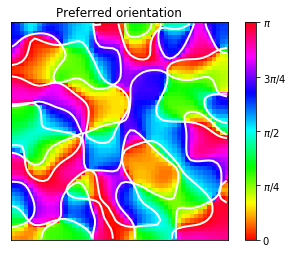

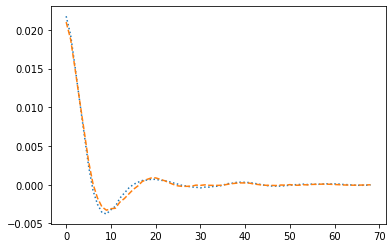

In [120]:
size = (50,50)

n = size[0] * size[1]
d = 3

# ground truth opm
m = make_opm(size=size, sigma=3., k=2., alpha=2.)

idx = get_2d_indices(size)

f, ax = plot_opm(m)


corr_real, r  = radial_component(np.real(m))
corr_imag, r  = radial_component(np.imag(m))

plt.figure()
plt.plot(r, corr_real, label='Empirical (real)', linestyle=':', color='C0')
plt.plot(r, corr_imag, label='Empirical (imaginary)', linestyle='--', color='C1')

In [131]:
m.shape

(50, 50)

In [133]:
maxr = int(np.floor(np.sqrt(m.shape[0] ** 2 + m.shape[1] ** 2)))
maxr

70

In [122]:
correlate2d(np.real(m), np.real(m)).shape

(99, 99)

In [123]:
from sklearn.metrics import pairwise_distances


corr = pairwise_distances(np.imag(m).reshape(-1, 1), metric=lambda x, y: x * y)[tril]
corr.shape

(3126250,)

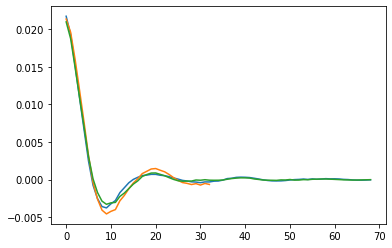

In [128]:


def radcorr(x, idx):
    tril = np.tril_indices(x.size)
    
    corr = pairwise_distances(x.reshape(-1, 1), metric=lambda x, y: x * y)[tril]
    dist = pairwise_distances(idx)[tril]

    spacing = np.arange(np.floor(dist.max() * 0.5))
    
    means = np.zeros(len(spacing) - 1)
    rs = np.zeros(len(spacing) - 1)


    for k in range(len(spacing) - 1):
        values = corr[(dist >= spacing[k]) & (dist < spacing[k+1])]

        rs[k] = spacing[k]
        means[k] = values.mean()
    return means, rs


means, rs = radcorr(np.real(m), idx)
means2, rs2 = radcorr(np.imag(m), idx)

    
plt.plot(r, corr_real)
plt.plot(rs,( means + means2 )/ 2)
plt.plot(r, corr_imag)
    